# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
sample_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q=sarangani"
sample_url
sample = requests.get(sample_url).json()
sample

{'coord': {'lon': 125.4636, 'lat': 5.4033},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 301.63,
  'feels_like': 305.09,
  'temp_min': 301.63,
  'temp_max': 301.63,
  'pressure': 1010,
  'humidity': 72,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 1.09, 'deg': 233, 'gust': 1.38},
 'clouds': {'all': 75},
 'dt': 1699849354,
 'sys': {'country': 'PH', 'sunrise': 1699824351, 'sunset': 1699867137},
 'timezone': 28800,
 'id': 1687186,
 'name': 'Sarangani',
 'cod': 200}

In [3]:
sample["coord"]["lat"]

5.4033

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities[0]


Number of cities in the list: 583


'kailua-kona'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kailua-kona
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | midvagur
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | salem
Processing Record 11 of Set 1 | tingi
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | hope mills
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | ad dilam
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | halden
Processing Record 21 of Set 1 | yuzhno-kurilsk
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 

In [6]:
city_data

[{'City': 'kailua-kona',
  'Lat': 19.6406,
  'Lng': -155.9956,
  'Max Temp': 300.13,
  'Humidity': 89,
  'Cloudiness': 75,
  'Wind Speed': 2.57,
  'Country': 'US',
  'Date': 1699849026},
 {'City': 'georgetown',
  'Lat': 5.4112,
  'Lng': 100.3354,
  'Max Temp': 305.11,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 3.09,
  'Country': 'MY',
  'Date': 1699848872},
 {'City': 'enewetak',
  'Lat': 11.3474,
  'Lng': 162.3373,
  'Max Temp': 300.78,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 6.93,
  'Country': 'MH',
  'Date': 1699849355},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 274.23,
  'Humidity': 77,
  'Cloudiness': 0,
  'Wind Speed': 0,
  'Country': 'US',
  'Date': 1699849355},
 {'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 270.6,
  'Humidity': 82,
  'Cloudiness': 0,
  'Wind Speed': 1.44,
  'Country': 'US',
  'Date': 1699849356},
 {'City': 'midvagur',
  'Lat': 62.0511,
  'Lng': -7.1939,
  'Max Temp': 279.61,
  'Humidit

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua-kona,19.6406,-155.9956,300.13,89,75,2.57,US,1699849026
1,georgetown,5.4112,100.3354,305.11,70,20,3.09,MY,1699848872
2,enewetak,11.3474,162.3373,300.78,81,100,6.93,MH,1699849355
3,bethel,41.3712,-73.4140,274.23,77,0,0.00,US,1699849355
4,albany,42.6001,-73.9662,270.60,82,0,1.44,US,1699849356


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,300.13,89,75,2.57,US,1699849026
1,georgetown,5.4112,100.3354,305.11,70,20,3.09,MY,1699848872
2,enewetak,11.3474,162.3373,300.78,81,100,6.93,MH,1699849355
3,bethel,41.3712,-73.4140,274.23,77,0,0.00,US,1699849355
4,albany,42.6001,-73.9662,270.60,82,0,1.44,US,1699849356


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

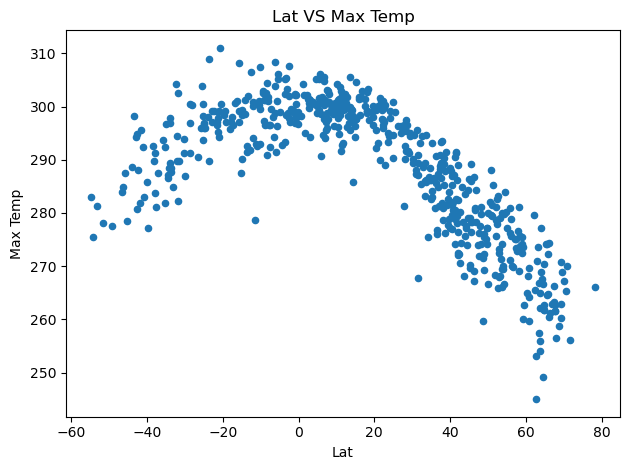

In [24]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat',y='Max Temp',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.tight_layout()

# Show plot
plt.show()

#### Latitude Vs. Humidity

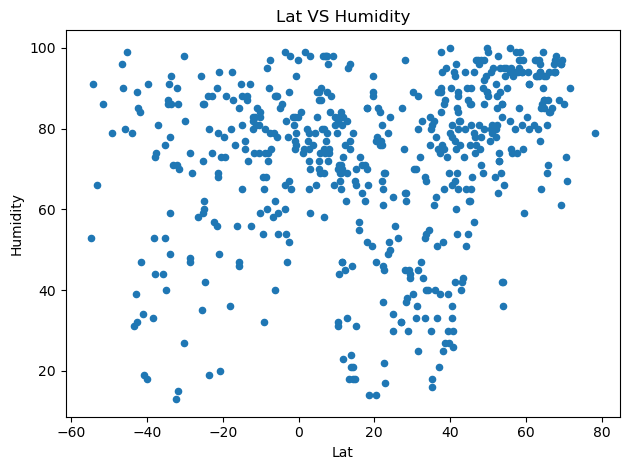

In [23]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat',y='Humidity',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")
plt.tight_layout()

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

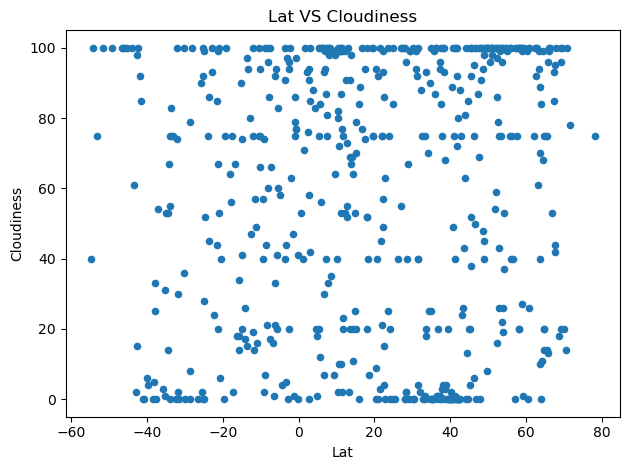

In [22]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat',y='Cloudiness',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

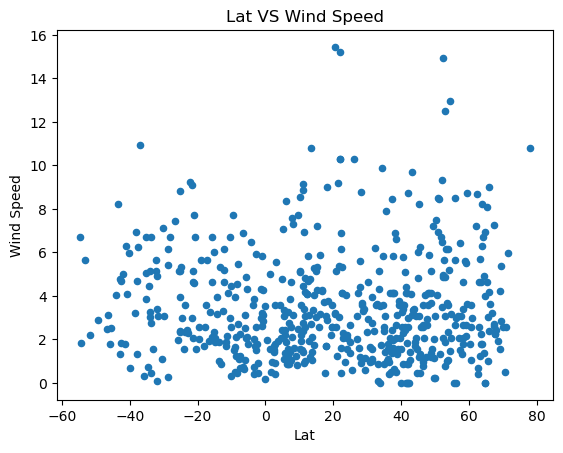

In [25]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat',y='Wind Speed',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Wind Speed")

# Save the 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [253]:
## Created function to create linear regressions for data frame,x,y
## Function takes: ( Dataframe,x-axis,y-axis,chart title(optional) )
def autoregress(data,x,y,z=""):

    df = data
    x_data = df[x]
    y_data = df[y]
    if z == "":
        z = f"{x} VS {y}"
    else: z == z 

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data, y_data)
    regress_values = x_data * slope + intercept

    df.plot.scatter(x=x,y=y,marker='o', linestyle='-')
    plt.plot(x_data,regress_values,"r-")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    correlation = stats.pearsonr(x_data,y_data)

    plt.title(f"{z}")
    plt.savefig(f"output_data/FigLinear({y}).png")
    plt.tight_layout()
    plt.annotate(line_eq,(max(x_data - 86),max(y_data)-1),fontsize=12,color="red",bbox=dict(boxstyle='round', fc='white', alpha=.8))

    print(f"The r-value is: {round(correlation[0],2)}")

    plt.show()

#### Latitude Vs. Temperature (Linear Regression)

The r-value is: -0.67


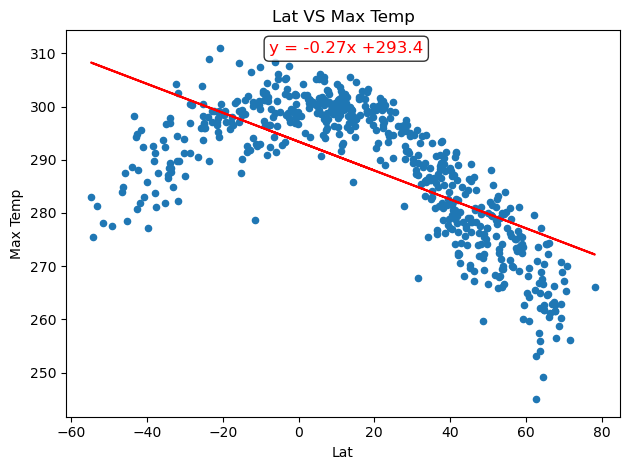

In [254]:
autoregress(city_data_df,"Lat","Max Temp")

#### Latitude Vs. Humidity(Linear Regression)

The r-value is: 0.19


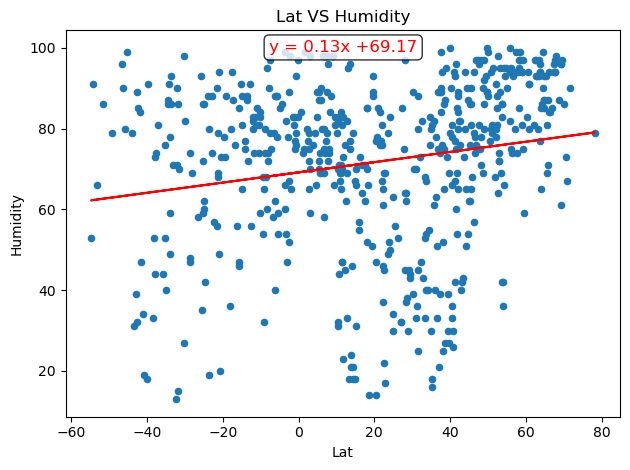

In [255]:
autoregress(city_data_df,"Lat","Humidity")

The r-value is: 0.07


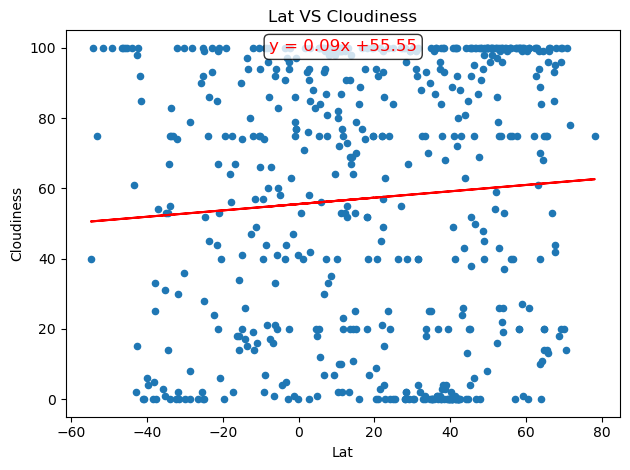

In [256]:
autoregress(city_data_df,"Lat","Cloudiness")

#### Latitude vs. Wind Speed Plot(Linear Regression)

The r-value is: -0.0


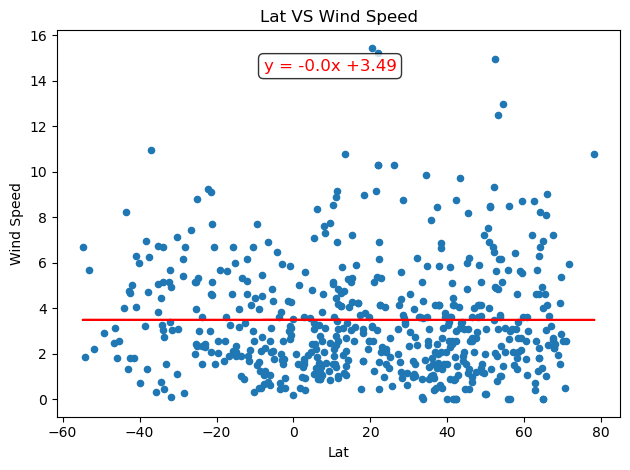

In [257]:
autoregress(city_data_df,"Lat","Wind Speed")

In [258]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,300.13,89,75,2.57,US,1699849026
1,georgetown,5.4112,100.3354,305.11,70,20,3.09,MY,1699848872
2,enewetak,11.3474,162.3373,300.78,81,100,6.93,MH,1699849355
3,bethel,41.3712,-73.4140,274.23,77,0,0.00,US,1699849355
4,albany,42.6001,-73.9662,270.60,82,0,1.44,US,1699849356


In [259]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
10,tingi,-11.3000,35.0333,292.95,81,49,2.17,TZ,1699849357
11,adamstown,-25.0660,-130.1015,295.94,86,99,8.81,PN,1699848846
13,blackmans bay,-43.0167,147.3167,294.22,39,2,1.34,AU,1699848875
18,waitangi,-43.9535,-176.5597,288.61,79,100,4.02,NZ,1699848860
21,port-aux-francais,-49.3500,70.2167,277.59,79,100,2.90,TF,1699849360


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.91


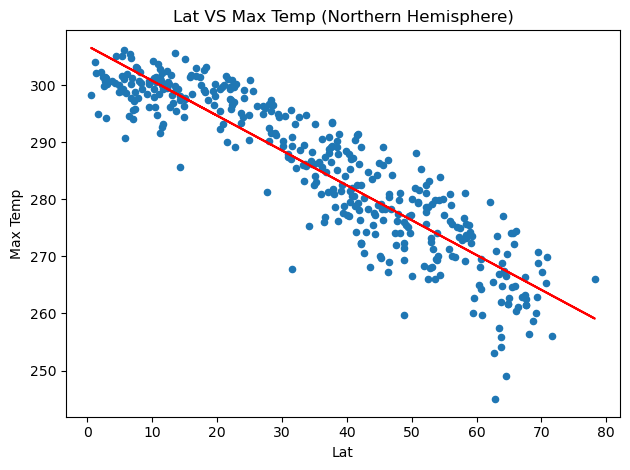

In [267]:
# Linear regression on Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Max Temp","Lat VS Max Temp (Northern Hemisphere)")

The r-value is: 0.67


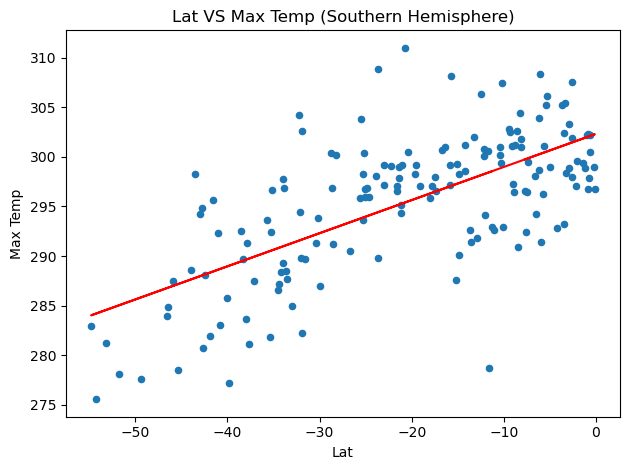

In [268]:
# Linear regression on Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Max Temp","Lat VS Max Temp (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3


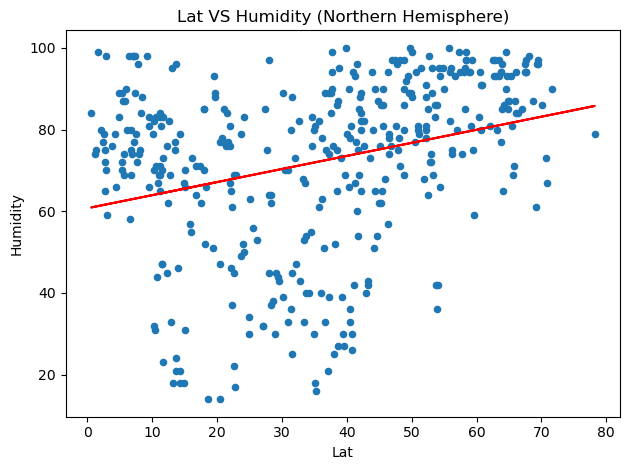

In [269]:
# Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Humidity","Lat VS Humidity (Northern Hemisphere)")

The r-value is: 0.2


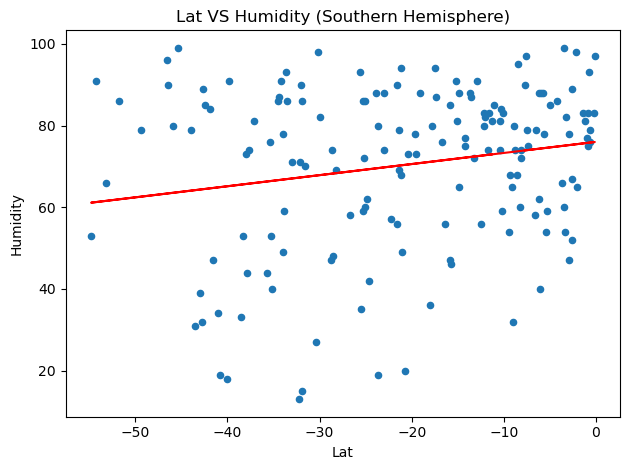

In [270]:
# Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Humidity","Lat VS Humidity (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03


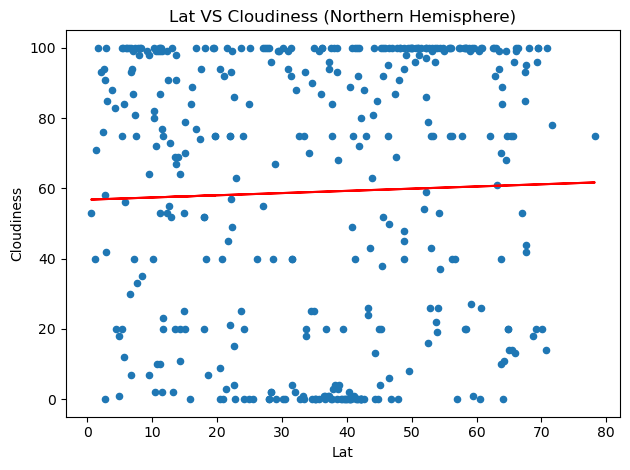

In [271]:
# Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Cloudiness","Lat VS Cloudiness (Northern Hemisphere)")

The r-value is: 0.02


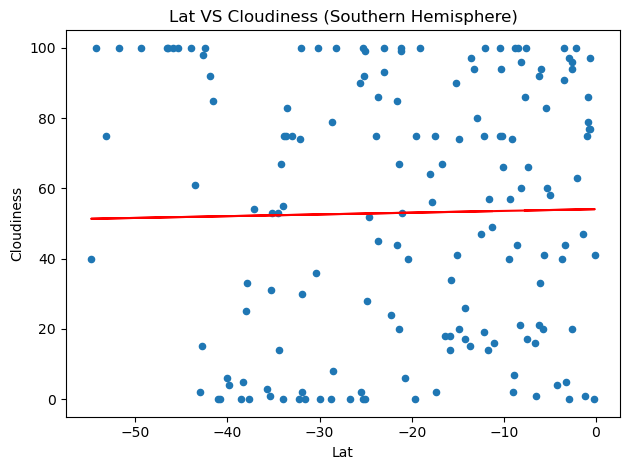

In [272]:
# Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Cloudiness","Lat VS Cloudiness (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06


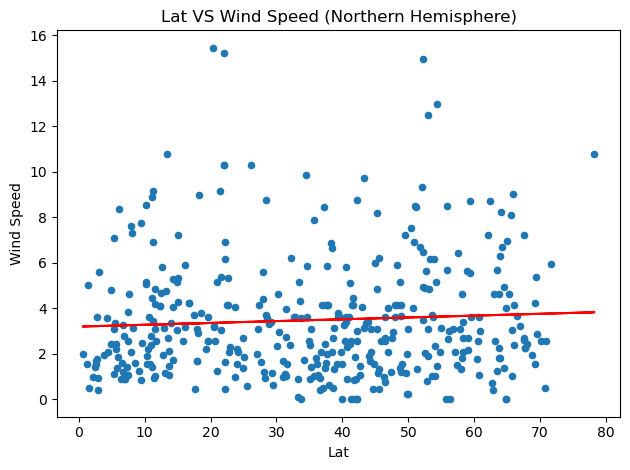

In [273]:
# Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Wind Speed","Lat VS Wind Speed (Northern Hemisphere)")

The r-value is: -0.21


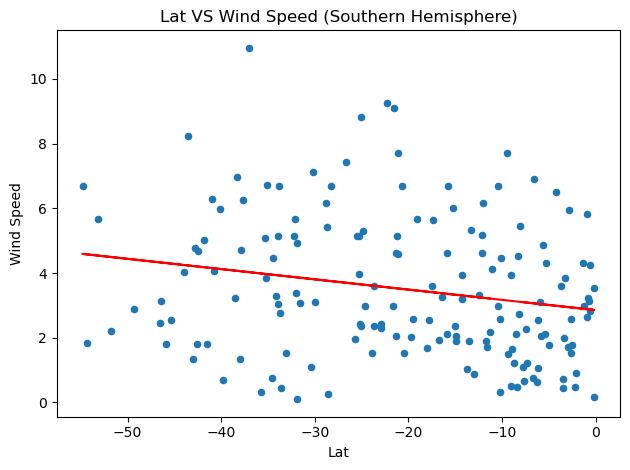

In [274]:
# Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Wind Speed","Lat VS Wind Speed (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE